## 트위터 텍스트 추출하기 (한국어)

In [1]:
import tweepy as tw

In [2]:
CONSUMER_KEY = 'V9nEPmEIXPpEVFhtBFCXbgLmG'
CONSUMER_SECRET = 'I7hK7Rdy4o4HkseL2YtX3jilHw6DWYxl6U4aBkarIaBwyTX5BD'
ACCESS_TOKEN = '302100653-L3FzpHC0Uwgch0slIhkPWTffCCMQ5db5vLTqZ1UW'
ACCESS_TOKEN_SECRET = 'yhxEktuSKuKvDhVc0CLOid2HfNxZFQcw0mU9STMagnUp8'

In [3]:
auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tw.API(auth, wait_on_rate_limit=True)

* 모든 텍스트 추출 (...으로 자르지 않고 텍스트 모두 추출)

In [4]:
query = "#드라마-filter:retweets"
tweets = tw.Cursor(api.search, q=query, tweet_mode='extended').items(5) # '#movie'와 '#action'을 포함하고 있는 최신 트윗 5개 추출(리트윗 제외)
[tweet.full_text for tweet in tweets]

['MOTHERFXXKER를 불러줘요! 2부 (完)+후기/Q&amp;A - MOTHERFXXKER를 불러줘요! - 서글 https://t.co/30Lff604nZ #만화 #일상 #창작 #단편만화 #드라마 #postype \n\n하/.////.........ㅠ....ㅠ_ㅠ...........................................................허...하..ㅏㅓ.................최고..',
 '[속보] 연기하는 김은영 소식\n.\n.\n.\n.\n춥지만 즐거운 현장\n봄 즈음 만날 수 있을거에요💕\n\n#노래하고연기하는 #김은영 \n#드라마 #춘정지란 #육체파 #아낙네 #하동 #순천 #사극 #겨울이지만봄입니다 https://t.co/YvT3uKbILu',
 "'웹툰' 원작으로 만들어 '핵꿀잼' 스토리 기대되는 방영 예정 드라마 5가지\n\n#웹툰원작 #드라마 #방영예정드라마 #웹툰\n\nhttps://t.co/2h9WFwnPEs",
 '▫️ 대한민국 최초 성인영화 플랫폼!\n\n◽️ 비플릭스 BFLIX ◽️\n[[ https://t.co/W3PplHmo2T ]]\n\n고전영화 무료영화 애니메이션\n성인영화만 1만편 이상~\n\n🛡️ 1일 이용권 + 포인트 받기\n🛡️ 추천인 코드 : 홍보왕 (회원가입시 입력)\n\n#최신영화 #성인영화\n#동영상 #스트리밍\n#드라마 #예능 #무료영화 https://t.co/nFOha2l2Cs',
 '#안중근 #드라마 #동방의아침\n#많은분들의 #응원 #관심 #지지 #참여\n#부탁드립니다 https://t.co/TEkRTGU6I5']

## 트위터 텍스트 전처리

In [5]:
!pip install konlpy

In [6]:
import re
from konlpy.tag import Komoran
#트윗 텍스트 중 한국어 텍스트만 추출
def get_korean(txt):
  only_korean = re.findall(r'[가-힣]+', txt)  # 텍스트에 있는 한국어 단어들만 가져옴
  return " ".join(only_korean)

#한국어 명사만 가져오기
def preprocess(text):
  komoran = Komoran()
  tokens = komoran.nouns(text)  #명사 추출
  tokens = [t for t in tokens if re.fullmatch(r'[가-힣]{2,}', t)] # 2글자 이상인 것만 추출
  return tokens

In [84]:
query = "#새해다짐-filter:retweets"
tweets = tw.Cursor(api.search, q=query, tweet_mode='extended').items(10)
tweet_texts = [get_korean(tweet.full_text) for tweet in tweets]  #트윗 텍스트 중 한국어만 가져오기
text = ' '.join(tweet_texts)                                     #10개의 트윗 텍스트들을 하나의 긴 텍스트로 합침
tokens = preprocess(text)                                        #2글자 이상 한국어 단어들의 토큰들로 만듦
print(tokens)

['아침', '식사', '시간', '생산', '하루', '내일', '교보문고', '작심', '린지', '공부', '자극', '교보문고', '참고서', '교보문고', '새해', '다짐', '스타', '그램', '공부', '흔적', '공부', '인증', '일차', '실질', '일차', '오늘', '마찬가지', '강의', '필기', '영어', '독해', '듣기', '단어', '내일', '예정', '교보문고', '작심', '린지', '공부', '자극', '교보문고', '참고서', '교보문고', '새해', '다짐', '스타', '그램', '공부', '흔적', '공부', '인증', '새해', '다짐', '작심', '삼일', '동기', '부여', '영화', '명대사', '영화', '영화', '명대사', '영화', '추천', '동기', '부여', '영화', '영화', '명대사', '시인', '사회', '행복', '라따뚜이', '영어', '명언', '영화', '스타', '그램', '인생', '명언', '명언', '모음', '새해', '다짐', '작심', '삼일', '지금', '새해', '다짐', '가능', '성은', '지금', '건광', '관리', '추천', '새해', '다짐', '건강', '관리', '계획', '도움', '서원', '서원대학교', '청주', '사범대학', '대학', '생활', '대학교', '새내기', '새해', '다짐', '건강', '건강관리', '추천', '수험', '수면', '식단', '러닝', '새해', '나이키', '새해', '목표', '다짐', '다짐', '순간', '도전', '시작', '새해', '다짐', '광고', '새해', '다짐', '가능', '성은', '지금', '러스트', '해인사', '새해', '다짐', '그림', '새해', '목표', '새해', '다짐', '다이어트', '성공', '노하우', '다이어트', '성공', '마음', '사람', '새해', '다짐', '이제', '기분', '아이', '동화책', '새해', '다짐']


## 워드클라우드 생성

In [8]:
!apt install fonts-nanum
!ls /usr/share/fonts/truetype/nanum/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
NanumBarunGothicBold.ttf  NanumMyeongjoBold.ttf  NanumSquareRoundR.ttf
NanumBarunGothic.ttf	  NanumMyeongjo.ttf	 NanumSquareR.ttf
NanumGothicBold.ttf	  NanumSquareB.ttf
NanumGothic.ttf		  NanumSquareRoundB.ttf


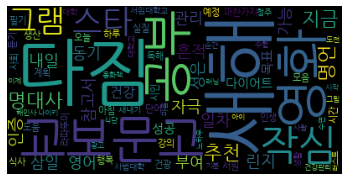

In [85]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', collocations=False).generate(' '.join(tokens))
plt.imshow(wc)
plt.axis("off")
plt.show()

# 동시출현단어 네트워크 (Word Co-occurrence Network) 분석

* 노드: 단어들
* 엣지: 두 단어가 하나의 트윗에 동시에 등장하면 엣지로 연결
  * 이 강의에서는 하나의 트윗 내에 인접하여 출현한 단어를 연결 (window size = 1)

In [86]:
from nltk import bigrams
tweet_tokens = [preprocess(tweet) for tweet in tweet_texts]
print(tweet_tokens)
tweet_bigrams = [list(bigrams(tweet)) for tweet in tweet_tokens]
print(tweet_bigrams)

[['아침', '식사', '시간', '생산', '하루', '내일', '교보문고', '작심', '린지', '공부', '자극', '교보문고', '참고서', '교보문고', '새해', '다짐', '스타', '그램', '공부', '흔적', '공부', '인증'], ['일차', '실질', '일차', '오늘', '마찬가지', '강의', '필기', '영어', '독해', '듣기', '단어', '내일', '예정', '교보문고', '작심', '린지', '공부', '자극', '교보문고', '참고서', '교보문고', '새해', '다짐', '스타', '그램', '공부', '흔적', '공부', '인증'], ['새해', '다짐', '작심', '삼일', '동기', '부여', '영화', '명대사', '영화', '영화', '명대사', '영화', '추천', '동기', '부여', '영화', '영화', '명대사', '시인', '사회', '행복', '라따뚜이', '영어', '명언', '영화', '스타', '그램', '인생', '명언', '명언', '모음', '새해', '다짐', '작심', '삼일'], ['지금', '새해', '다짐', '가능', '성은', '지금'], ['건광', '관리', '추천', '새해', '다짐', '건강', '관리', '계획', '도움', '서원', '서원대학교', '청주', '사범대학', '대학', '생활', '대학교', '새내기', '새해', '다짐', '건강', '건강관리', '추천', '수험', '수면', '식단', '러닝'], ['새해', '나이키', '새해', '목표', '다짐', '다짐', '순간', '도전', '시작', '새해', '다짐', '광고', '새해', '다짐', '가능', '성은', '지금'], ['러스트', '해인사', '새해', '다짐', '그림'], ['새해', '목표', '새해', '다짐', '다이어트', '성공', '노하우', '다이어트', '성공'], ['마음', '사람', '새해', '다짐'], ['이제', '기분', '아이', '동화책',

In [87]:
tweet_bigrams_flatten = [item for sublist in tweet_bigrams for item in sublist]
tweet_bigrams_flatten = list(set(tweet_bigrams_flatten))   # 중복 제거
tweet_bigrams_flatten[0:10]

[('다이어트', '성공'),
 ('그램', '공부'),
 ('순간', '도전'),
 ('청주', '사범대학'),
 ('교보문고', '작심'),
 ('생산', '하루'),
 ('삼일', '동기'),
 ('교보문고', '새해'),
 ('스타', '그램'),
 ('영화', '추천')]

In [88]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(tweet_bigrams_flatten)

In [14]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 아래 한글 폰트를 나오게 하기 위해 설치 후 런타임 재시작 (런타임 - 런타임 다시 시작) 필요

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


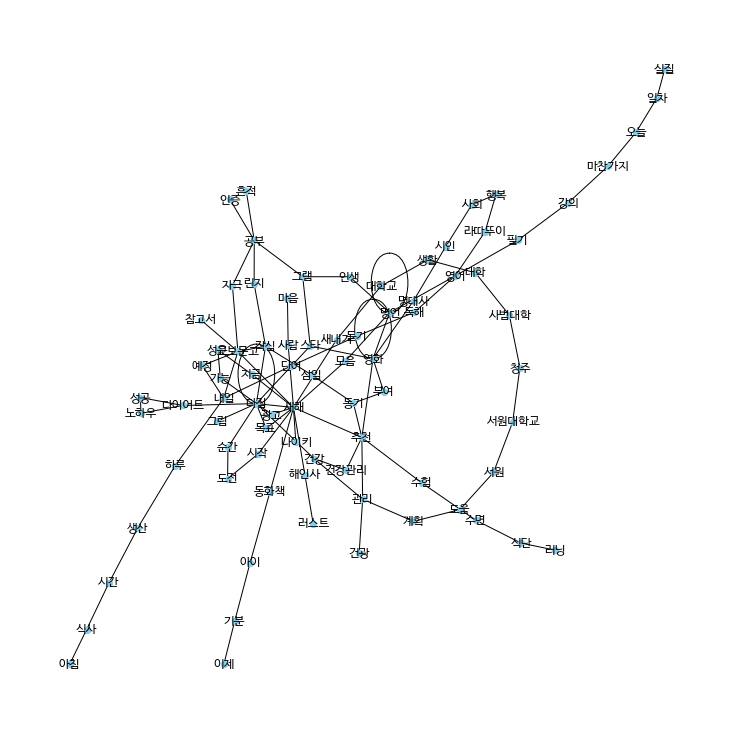

In [89]:
fig = plt.figure(figsize=(10,10))          # 그림 크기 설정
nx.draw(G, with_labels=True, node_size=40, node_color='skyblue', font_family='NanumBarunGothic') 
plt.show()

* 차수 중심성 Top 5

In [90]:
deg_centrality = nx.degree_centrality(G)
sorted(deg_centrality.items(), key = lambda item: item[1], reverse=True)[0:5]

[('새해', 0.1625),
 ('다짐', 0.15000000000000002),
 ('영화', 0.08750000000000001),
 ('교보문고', 0.07500000000000001),
 ('추천', 0.07500000000000001)]

* 매개 중심성 Top 5

In [91]:
betw_centrality = nx.betweenness_centrality(G)
sorted(betw_centrality.items(), key = lambda item: item[1], reverse=True)[0:5]

[('새해', 0.5404987944544907),
 ('추천', 0.279416063893912),
 ('교보문고', 0.24024261603375519),
 ('다짐', 0.21544153104279687),
 ('영어', 0.20687914406268834)]

* 커뮤니티 탐지

In [92]:
from networkx.algorithms import community
partition = list(community.greedy_modularity_communities(G))
print("커뮤니티 개수:", len(partition))
print("커뮤니티의 구성원 수:", [len(x) for x in partition])

커뮤니티 개수: 9
커뮤니티의 구성원 수: [16, 13, 12, 11, 9, 8, 5, 4, 3]


In [105]:
print(partition[0])

frozenset({'도전', '시작', '다짐', '지금', '광고', '가능', '해인사', '나이키', '새해', '러스트', '순간', '목표', '마음', '그림', '사람', '성은'})
